In [2]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el conjunto de datos
file_path = '/content/drive/My Drive/ColabData/blackjack.csv'
data = pd.read_csv(file_path, nrows=500000)

# Mostrar el nombre de todas las columnas
print(data.columns)

# Seleccionar las variables de interés
data = data[['cards_remaining', 'dealer_up', 'initial_hand', 'run_count', 'true_count', 'actions_taken', 'win']]

# Mostrar las primeras filas del conjunto de datos
print("Primeras 5 filas del conjunto de datos:")
print(data.head())

# Mostrar información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(data.info())

# Mostrar la forma del conjunto de datos
print("\nForma del conjunto de datos:")
print(data.shape)

# Descripción estadística de las variables numéricas
print("\nDescripción estadística de las variables numéricas:")
print(data.describe())

# Verificar valores nulos
print("\nValores nulos en el conjunto de datos:")
print(data.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['shoe_id', 'cards_remaining', 'dealer_up', 'initial_hand',
       'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken', 'run_count', 'true_count',
       'win'],
      dtype='object')
Primeras 5 filas del conjunto de datos:
   cards_remaining  dealer_up initial_hand  run_count  true_count  \
0              416         10     [10, 11]          1           0   
1              411         10       [5, 5]         -2           0   
2              406          6      [3, 10]         -2           0   
3              401         10       [5, 9]         -1           0   
4              395          8      [6, 10]         -1           0   

       actions_taken  win  
0            [['S']]  1.5  
1       [['H', 'S']]  1.0  
2            [['S']]  1.0  
3  [['H', 'H', 'S']]  0.0  
4            [['H']] -1.0  

Informació

In [3]:
# Convertir 'initial_hand' de cadena a lista de cartas
import ast

data['initial_hand'] = data['initial_hand'].apply(ast.literal_eval)

# Extraer el valor numérico de las cartas
def card_value(card):
    if card in ["J", "Q", "K"]:
        return 10
    elif card == "A":
        return 11  # Asumimos que el As vale 11 inicialmente
    else:
        return int(card)

# Convertir las cartas de 'initial_hand' a sus valores numéricos
data['initial_hand_values'] = data['initial_hand'].apply(lambda x: [card_value(card) for card in x])

# Calcular el valor total de la mano inicial del jugador
data['player_initial_value'] = data['initial_hand_values'].apply(sum)

# Convertir 'dealer_up' a su valor numérico
data['dealer_up_value'] = data['dealer_up'].apply(str).apply(card_value)



Frecuencia de las acciones tomadas:
first_action
S    209439
H    158857
D     48938
N     38133
R     20623
P     12266
Name: count, dtype: int64


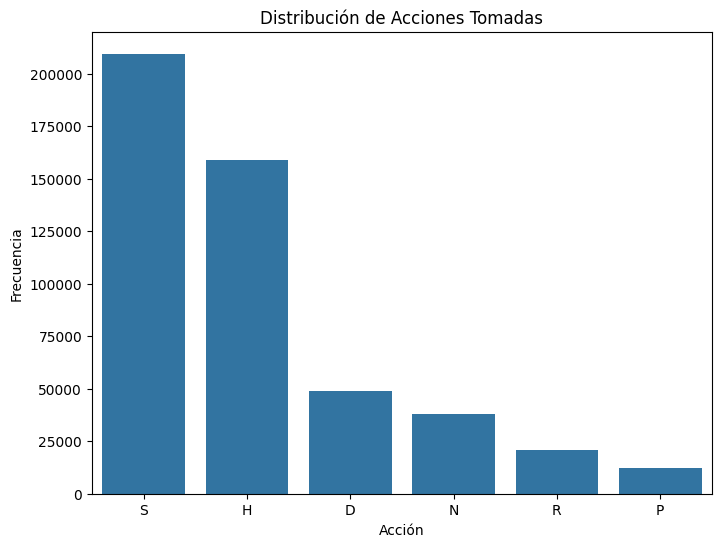

In [4]:
# Extraer la primera acción tomada
import re

def extract_first_action(actions):
    actions_str = str(actions)
    match = re.search(r"[A-Z]+", actions_str)  # Encontrar la primera acción
    return match.group(0) if match else None

data['first_action'] = data['actions_taken'].apply(extract_first_action)

# Contar la frecuencia de cada acción
action_counts = data['first_action'].value_counts()
print("\nFrecuencia de las acciones tomadas:")
print(action_counts)

# Graficar la distribución de acciones tomadas
plt.figure(figsize=(8,6))
sns.countplot(x='first_action', data=data, order=action_counts.index)
plt.title('Distribución de Acciones Tomadas')
plt.xlabel('Acción')
plt.ylabel('Frecuencia')
plt.show()



Descripción estadística de la variable 'win':
count    500000.000000
mean         -0.005800
std           1.145934
min          -7.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: win, dtype: float64


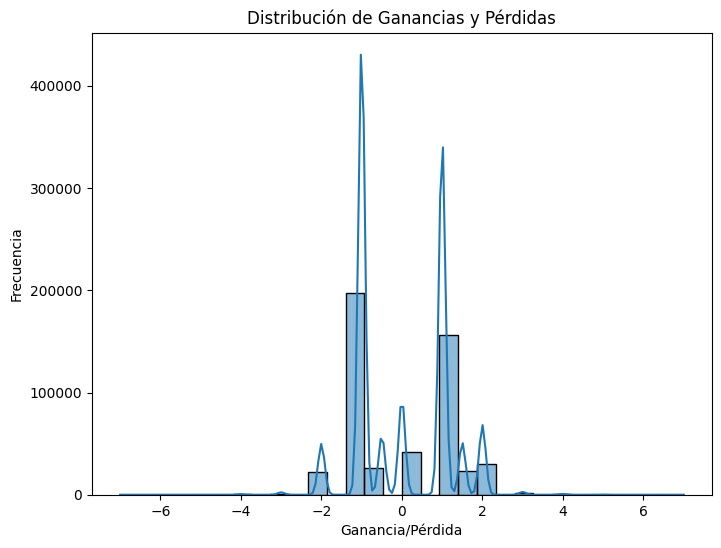


Frecuencia de resultados:
result
Perdido    247133
Ganado     210955
Empate      41912
Name: count, dtype: int64


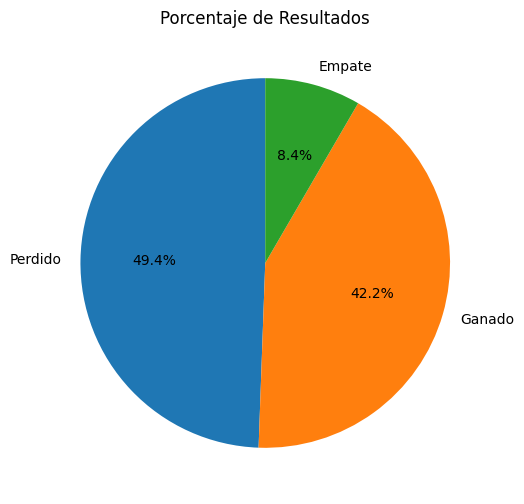

In [5]:
# Descripción estadística de la variable 'win'
print("\nDescripción estadística de la variable 'win':")
print(data['win'].describe())

# Histograma de 'win'
plt.figure(figsize=(8,6))
sns.histplot(data['win'], bins=30, kde=True)
plt.title('Distribución de Ganancias y Pérdidas')
plt.xlabel('Ganancia/Pérdida')
plt.ylabel('Frecuencia')
plt.show()

# Contar el número de juegos ganados, perdidos y empatados
def categorize_win(value):
    if value > 0:
        return 'Ganado'
    elif value < 0:
        return 'Perdido'
    else:
        return 'Empate'

data['result'] = data['win'].apply(categorize_win)
result_counts = data['result'].value_counts()
print("\nFrecuencia de resultados:")
print(result_counts)

# Gráfico de pastel de resultados
plt.figure(figsize=(6,6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Resultados')
plt.show()



Matriz de correlación:
                      cards_remaining  dealer_up_value  player_initial_value  \
cards_remaining              1.000000        -0.001606             -0.001316   
dealer_up_value             -0.001606         1.000000             -0.004096   
player_initial_value        -0.001316        -0.004096              1.000000   
run_count                   -0.005864         0.041486              0.058532   
true_count                  -0.013403         0.043760              0.062190   
win                         -0.000094        -0.128552              0.200596   

                      run_count  true_count       win  
cards_remaining       -0.005864   -0.013403 -0.000094  
dealer_up_value        0.041486    0.043760 -0.128552  
player_initial_value   0.058532    0.062190  0.200596  
run_count              1.000000    0.860440  0.012420  
true_count             0.860440    1.000000  0.014375  
win                    0.012420    0.014375  1.000000  


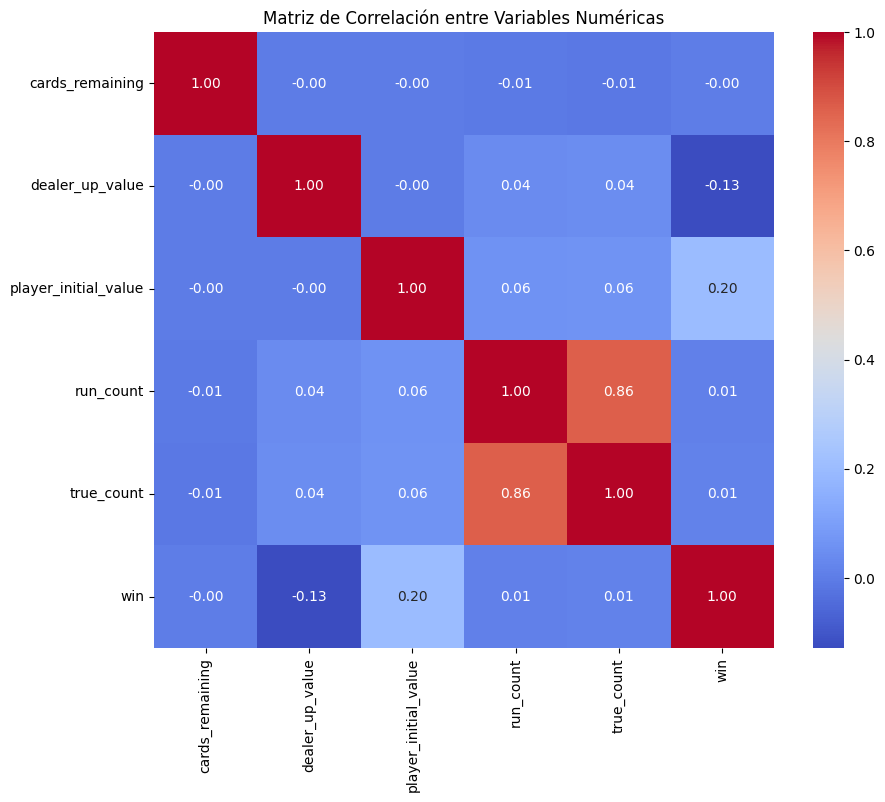

In [7]:
numeric_vars = ['cards_remaining', 'dealer_up_value', 'player_initial_value', 'run_count', 'true_count']

# Matriz de correlación
corr_matrix = data[numeric_vars + ['win']].corr()
print("\nMatriz de correlación:")
print(corr_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()



Tabla cruzada de acciones y resultados:
result        Empate  Ganado  Perdido
first_action                         
D               3339   26741    18858
H              13380   53361    92116
N               3178    8769    26186
P               1636    5525     5105
R                  0       0    20623
S              19795  116559    73085


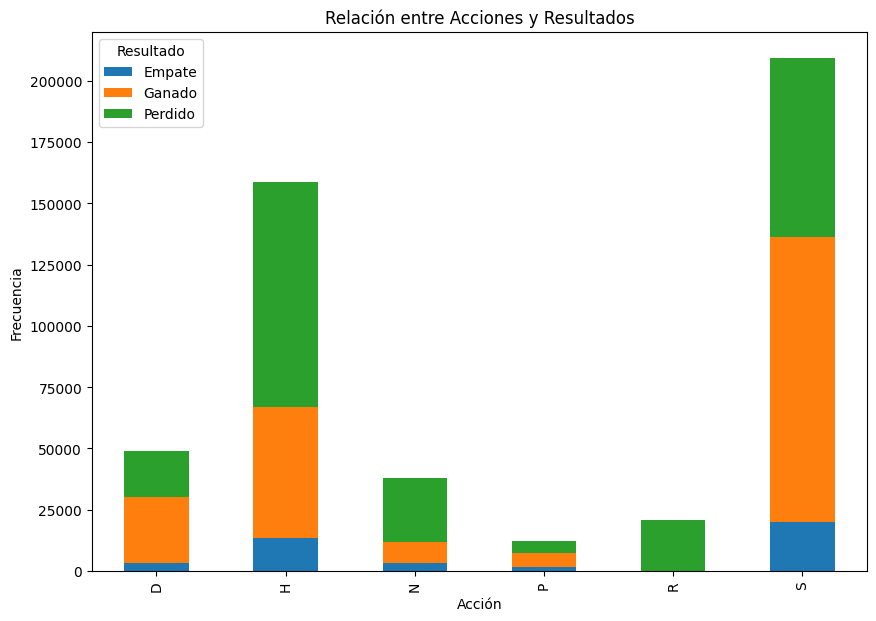

In [8]:
# Tabla cruzada de acciones y resultados
action_result = pd.crosstab(data['first_action'], data['result'])
print("\nTabla cruzada de acciones y resultados:")
print(action_result)

# Gráfico de acciones vs resultados
action_result.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Relación entre Acciones y Resultados')
plt.xlabel('Acción')
plt.ylabel('Frecuencia')
plt.legend(title='Resultado')
plt.show()


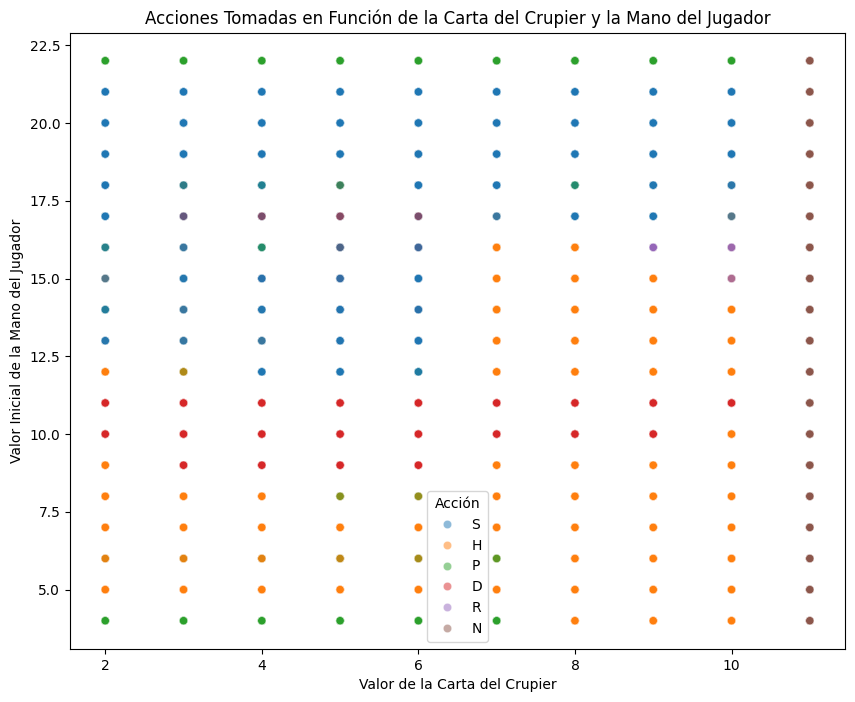

In [9]:
# Gráfico de dispersión de 'dealer_up_value' vs 'player_initial_value', coloreado por acción
plt.figure(figsize=(10,8))
sns.scatterplot(x='dealer_up_value', y='player_initial_value', hue='first_action', data=data, alpha=0.5)
plt.title('Acciones Tomadas en Función de la Carta del Crupier y la Mano del Jugador')
plt.xlabel('Valor de la Carta del Crupier')
plt.ylabel('Valor Inicial de la Mano del Jugador')
plt.legend(title='Acción')
plt.show()
